**Submitted by** : Ritu Gahir

**Team Members** : 

Libin Kutty - Group 2 

Ritu Gahir - Group 3

Viju Sudhi - Group 10

In [0]:
%tensorflow_version 2.x

In [0]:
pip install tensorflow

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc3


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/Colab Notebooks/"

'Copy of Untitled0.ipynb'       IDL_Assingnment_1.ipynb   Untitled1.ipynb
 datasets.py		        __pycache__
'IDL_Assingnment_1 (2).ipynb'   Untitled0.ipynb


In [0]:
import os
print(os.getcwd())

/content


In [0]:
os.chdir("/content/drive/My Drive/Colab Notebooks/")

In [0]:
print(os.getcwd())

/content/drive/My Drive/Colab Notebooks


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

The below cell is used to calculate the loss/error between the predicted label and the truth label

In [0]:
def loss(logits, labels):
  return tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=labels))

Linear Model just for understanding

In [0]:
class Linear_Model():
  def __init__(self):

    self.W = tf.Variable(np.zeros([784, 10]).astype(np.float32))
    self.b = tf.Variable(np.zeros(10, dtype=np.float32))

    self.loss = 0.0
    self.accuracy = 0.0

  def train(self, inputs, outputs, learning_rate):
    
    with tf.GradientTape() as t:
      logits = tf.matmul(inputs, self.W) + self.b
      self.loss = loss(logits, outputs)

    dW, db = t.gradient(self.loss, [self.W, self.b])


    self.W.assign_sub(learning_rate * dW)
    self.b.assign_sub(learning_rate * db)

    preds = tf.argmax(logits, axis=1, output_type=tf.int32)
    self.accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, outputs),
                             tf.float32))


Multi-Layer Perceptron with one hidden layers

**Observation**

1.Initializing the weights to 0 will lead to no learning, as weights are multiplied to input, inputs will have no relevance while training. It will affect the gradient.
When we tried to train the network by initializing the weights to 0, we observed that the accuracy (only 10% ) was same for all epochs which means the model was not able to learn.
It seems that since weights are same which is zero, all the weights will follow the same gradient.


In [0]:
class MLP_Model(object):
  def __init__(self):

    self.W = tf.Variable(tf.random.uniform(shape=[784,300], minval=-0.10, maxval=0.1, dtype=np.float32))
    self.b = tf.Variable(np.zeros(300, dtype=np.float32))
#    self.b = tf.Variable(tf.random.uniform(shape=[20], minval=0, maxval=1, dtype=np.float32))


    self.W2 = tf.Variable(tf.random.uniform(shape=[300,10], minval=-0.1, maxval=0.1, dtype=np.float32))
    self.b2 = tf.Variable(np.zeros(10, dtype=np.float32))
#    self.b2 = tf.Variable(tf.random.uniform(shape=[10], minval=0, maxval=1, dtype=np.float32))

    self.loss = 0.0
    self.accuracy = 0.0

  def train(self, inputs, outputs, learning_rate):

    with tf.GradientTape() as t1:

      with tf.GradientTape() as t:
        # Hidden layer
        l1 = tf.add(tf.matmul(inputs, self.W), self.b)
        l1_op = tf.nn.relu(l1)

        # Output layer
        l2 = tf.add(tf.matmul(l1_op, self.W2), self.b2)
        y_pred = tf.nn.softmax(l2)

        #logits = tf.matmul(inputs, self.W) + self.b
        self.loss = loss(y_pred, outputs)

      dW, db = t.gradient(self.loss, [self.W2, self.b2])
      self.W2.assign_sub(learning_rate * dW)
      self.b2.assign_sub(learning_rate * db)

    dW_h, db_h = t1.gradient(self.loss, [self.W, self.b])
    self.W.assign_sub(learning_rate * dW_h)
    self.b.assign_sub(learning_rate * db_h)

    preds = tf.argmax(y_pred, axis=1, output_type=tf.int32)
    self.accuracy = tf.reduce_mean(tf.cast(tf.equal(preds, outputs),
                             tf.float32))


**Wrapping of low level features**

The code where we create layer and apply gradient should be wrapped in higher level interface as adding more layer will make it complicated to write and to read.

In [0]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)


In [25]:
model = Linear_Model()
batch_size = 128
steps = range(1000)
for step in steps:

  img_batch, lbl_batch = data.next_batch()
  model.train(img_batch, lbl_batch, learning_rate=0.1)
  if not step % 100:
    print('Step %2d: loss=%2.5f, accuracy=%2.5f' %
        (step, model.loss, model.accuracy))



Step  0: loss=2.30259, accuracy=0.14062
Step 100: loss=0.55781, accuracy=0.90625
Step 200: loss=0.47617, accuracy=0.86719
Step 300: loss=0.50495, accuracy=0.84375
Step 400: loss=0.47099, accuracy=0.85156
Starting new epoch...
Step 500: loss=0.52345, accuracy=0.87500
Step 600: loss=0.46205, accuracy=0.82812
Step 700: loss=0.42221, accuracy=0.91406
Step 800: loss=0.50402, accuracy=0.84375
Step 900: loss=0.44049, accuracy=0.90625
Starting new epoch...


In [77]:
test_preds = tf.argmax(tf.matmul(data.test_data, model.W) + model.b, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)
print(data.test_labels[0], test_preds[0])

tf.Tensor(0.9101, shape=(), dtype=float32)
7 tf.Tensor(7, shape=(), dtype=int32)


In [78]:
mlp_model = MLP_Model()

batch_size = 128
steps = range(1000)
for step in steps:
  img_batch, lbl_batch = data.next_batch()
  
  #import ipdb; ipdb.set_trace()   # For Debugging
  mlp_model.train(img_batch, lbl_batch, learning_rate=0.1)
  if not step % 100:
    print('Step %2d: loss=%2.5f, accuracy=%2.5f' %
        (step, mlp_model.loss, mlp_model.accuracy))


Step  0: loss=2.30364, accuracy=0.09375
Step 100: loss=2.10220, accuracy=0.54688
Step 200: loss=1.87098, accuracy=0.70312
Step 300: loss=1.72729, accuracy=0.84375
Step 400: loss=1.70082, accuracy=0.82031
Starting new epoch...
Step 500: loss=1.75588, accuracy=0.73438
Step 600: loss=1.65992, accuracy=0.82812
Step 700: loss=1.61301, accuracy=0.89062
Step 800: loss=1.61462, accuracy=0.86719
Starting new epoch...
Step 900: loss=1.65642, accuracy=0.81250


In [79]:
test_preds_h = tf.matmul(data.test_data, mlp_model.W) + mlp_model.b
test_preds = tf.argmax(tf.matmul(test_preds_h, mlp_model.W2) + mlp_model.b2, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)
print(data.test_labels[50], test_preds[50])

tf.Tensor(0.8323, shape=(), dtype=float32)
6 tf.Tensor(6, shape=(), dtype=int32)


Average Accuracy over Class Accuracy:  0.8056019237561115


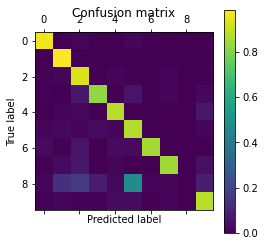

In [0]:
cm = confusion_matrix(data.test_labels,test_preds)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sum = 0
count = 0
for i in cm.diagonal():
    sum = sum + i
    count = count + 1

average = sum / count

print("Average Accuracy over Class Accuracy: ",average)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Experiments with hidden layer unit, weights and activation function

Experiment 1

---

> Weights = -0.1 to 0.1
Hidden Layer Units - 100 
Activation Function - ReLU and Softmax 
Training Accuracy = 82%  Testing Accuracy = 83%

Experiment 2

---
> Weights = -0.1 to 0.1
Hidden Layer Units - 200
Activation Function - ReLU and Softmax 
Training Accuracy = 85%  Testing Accuracy = 88%

Experiment 3

---
> Weights = -0.1 to 0.1
Hidden Layer Units - 300
Activation Function - ReLU and Softmax 
Training Accuracy = 89%  Testing Accuracy = 88%

Experiment 4

---
> Weights = -0.1 to 0.1
Hidden Layer Units - 300
Activation Function - Tanh and Sigmoid 
Training Accuracy = 90%  Testing Accuracy = 88%

Experiment 5

---
> Weights = 0 to 0.1
Hidden Layer Units - 300
Activation Function - Tanh and Sigmoid 
Training Accuracy = 07%  Testing Accuracy = 09%

Experiment 6

---
> Weights = -0.2 to 0.2
Hidden Layer Units - 300
Activation Function - ReLU and Softmax 
Training Accuracy = 80%  Testing Accuracy = 80%

Experiment 7

---
> Addition of one more hidden layer  
Weights = -0.1 to 0.1
Hidden Layer Units - 300 and 200
Activation Function - ReLU 
Training Accuracy = 82%  Testing Accuracy = 82%


In [0]:
fs_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fs_mnist.load_data()

fs_mnist_data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

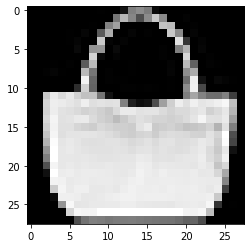

In [0]:
plt.imshow(train_images[100], cmap="Greys_r")

In [0]:
mlp_fs_model = MLP_Model()

batch_size = 128
steps = range(1000)
for step in steps:
  fs_img_batch, fs_lbl_batch = fs_mnist_data.next_batch()
  #import ipdb; ipdb.set_trace()   # For Debugging

  mlp_fs_model.train(fs_img_batch, fs_lbl_batch, learning_rate=0.1)
  if not step % 100:
    print('Step %2d: loss=%2.5f, accuracy=%2.5f' %
      (step, mlp_fs_model.loss, mlp_fs_model.accuracy))

Step  0: loss=2.30577, accuracy=0.05469
Step 100: loss=2.12603, accuracy=0.39844
Step 200: loss=1.86033, accuracy=0.71094
Step 300: loss=1.91588, accuracy=0.59375
Step 400: loss=1.82378, accuracy=0.65625
Starting new epoch...
Step 500: loss=1.80961, accuracy=0.67969
Step 600: loss=1.77159, accuracy=0.72656
Step 700: loss=1.76420, accuracy=0.72656
Step 800: loss=1.72703, accuracy=0.75000
Step 900: loss=1.79491, accuracy=0.68750
Starting new epoch...


In [0]:
test_preds_fs_h = tf.matmul(fs_mnist_data.test_data, mlp_fs_model.W) + mlp_fs_model.b
test_preds_fs = tf.argmax(tf.matmul(test_preds_fs_h, mlp_fs_model.W2) + mlp_fs_model.b2, axis=1,
                       output_type=tf.int32)
acc_fs = tf.reduce_mean(tf.cast(tf.equal(test_preds_fs, fs_mnist_data.test_labels),
                             tf.float32))
print(acc_fs)
print(fs_mnist_data.test_labels[50], test_preds_fs[50])

tf.Tensor(0.7605, shape=(), dtype=float32)
4 tf.Tensor(4, shape=(), dtype=int32)


Average Accuracy over Class Accuracy:  0.7604999999999998


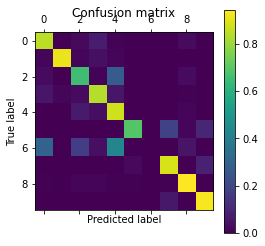

In [0]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(fs_mnist_data.test_labels,test_preds_fs)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sum = 0
count = 0
for i in cm.diagonal():
    sum = sum + i
    count = count + 1

average = sum / count

print("Average Accuracy over Class Accuracy: ",average)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()